### Import Libraries

In [1]:
# !pip install scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from scipy.stats import ttest_ind, mannwhitneyu

# 1- Data Overview

In [2]:
df = pd.read_csv('./data/bmi1_data.csv')
df.head()

,"height;""weight"";""gender"";""urbanity"";""fastfood"""
0,180;80;1;5;24
1,185;98;1;1;6
2,180;80;1;5;6
3,168;60;0;4;24
4,173;83;1;5;24


In [3]:
df.columns

Index(['height;"weight";"gender";"urbanity";"fastfood"'], dtype='object')

In [4]:
df.shape

(145, 1)

### Extract and clean column names

In [5]:
# 1. Extract and clean column names
col_string = df.columns[0]
col_names = [c.replace('"', '') for c in col_string.split(';')]

# 2. Split the values into columns
df_new = df[col_string].str.split(';', expand=True)
df_new.columns = col_names

print(df_new)

    height weight gender urbanity fastfood
0      180     80      1        5       24
1      185     98      1        1        6
2      180     80      1        5        6
3      168     60      0        4       24
4      173     83      1        5       24
..     ...    ...    ...      ...      ...
140    162     69      0        2        6
141    174     73      1        5    182.5
142    170     70      0        4        6
143    178     56      0        5        1
144    163    105      0        3        0

[145 rows x 5 columns]


### Check for missing values and data types

In [6]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   height    145 non-null    object
 1   weight    145 non-null    object
 2   gender    145 non-null    object
 3   urbanity  145 non-null    object
 4   fastfood  145 non-null    object
dtypes: object(5)
memory usage: 5.8+ KB


### Changing data types

In [7]:
df_new[['height', 'weight', 'fastfood']] = df_new[['height', 'weight', 'fastfood']].astype(float)

In [8]:
df_new.head()

,height,weight,gender,urbanity,fastfood
0,180.0,80.0,1,5,24.0
1,185.0,98.0,1,1,6.0
2,180.0,80.0,1,5,6.0
3,168.0,60.0,0,4,24.0
4,173.0,83.0,1,5,24.0


In [9]:
df_new.describe()

,height,weight,fastfood
count,145.000000,145.000000,145.000000
mean,173.903448,76.737931,21.037241
std,9.328365,15.208286,40.321484
min,154.000000,50.000000,0.000000
25%,166.000000,65.000000,6.000000
50%,173.000000,75.000000,6.000000
75%,182.000000,87.000000,24.000000
max,196.000000,130.000000,365.000000


In [10]:
#List all variables in the dataset
df_new.columns

Index(['height', 'weight', 'gender', 'urbanity', 'fastfood'], dtype='object')

In [11]:
# is fastfood categorical or numerical?
df_new['fastfood'].dtype
df_new['fastfood'].value_counts()
# is fastfood categorical or quantitative?
# fastfood is a quantitative variable as it represents the number of times a person eats fast food per week.

fastfood
6.0      72
24.0     39
1.0      14
78.2     12
0.0       5
182.5     2
365.0     1
Name: count, dtype: int64

# 2- Calculating BMI

- Compute BMI for each respondent using the formula:

  $$\text{BMI} = \frac{\text{weight (kg)}}{\left[\text{height (m)}\right]^2}$$

- Add BMI as a new column to the dataset.

In [12]:
df_new['BMI'] = df_new['weight'] / (df_new['height'] / 100) ** 2
df_new.head()


,height,weight,gender,urbanity,fastfood,BMI
0,180.0,80.0,1,5,24.0,24.691358
1,185.0,98.0,1,1,6.0,28.634039
2,180.0,80.0,1,5,6.0,24.691358
3,168.0,60.0,0,4,24.0,21.258503
4,173.0,83.0,1,5,24.0,27.732300


# 3- Empirical Distribution of BMI

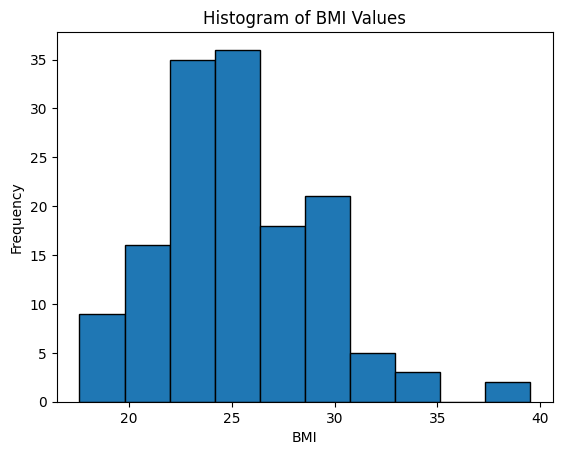

In [13]:
# Plot a histogram of the BMI values
plt.hist(df_new['BMI'], bins=10, edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Histogram of BMI Values')
plt.show()

In [14]:
# Describe the distribution of BMI values
bmi = df_new['BMI']

# Symmetry and skewness
skewness = bmi.skew()
if skewness > 0:
    skew_desc = "right-skewed (positively skewed)"
elif skewness < 0:
    skew_desc = "left-skewed (negatively skewed)"
else:
    skew_desc = "approximately symmetric"

# Possible negative values
has_negative = (bmi < 0).any()

# Variation
variation = bmi.std()

print(f"Distribution description:")
print(f"- Symmetry/Skewness: The distribution is {skew_desc} (skewness = {skewness:.2f}).")
print(f"- Negative values present: {'Yes' if has_negative else 'No'}")
print(f"- Variation (standard deviation): {variation:.2f}")
print(f"- Range: {bmi.min():.2f} to {bmi.max():.2f}")

Distribution description:
- Symmetry/Skewness: The distribution is right-skewed (positively skewed) (skewness = 0.67).
- Negative values present: No
- Variation (standard deviation): 3.83
- Range: 17.58 to 39.52


# 4- Gender Subsets

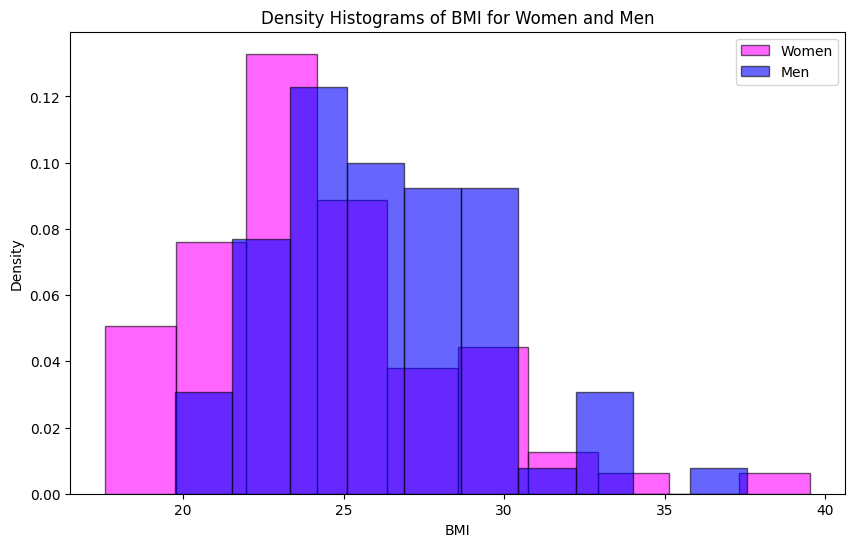

Women BMI: mean = 24.22, std = 4.05, skew = 1.03
Men BMI: mean = 26.27, std = 3.33, skew = 0.70


In [15]:
# Create subsets for women and men
df_women = df_new[df_new['gender'] == '0']
df_men = df_new[df_new['gender'] == '1']

# Plot density histograms for each group
plt.figure(figsize=(10, 6))
plt.hist(df_women['BMI'], bins=10, density=True, alpha=0.6, label='Women', color='magenta', edgecolor='black')
plt.hist(df_men['BMI'], bins=10, density=True, alpha=0.6, label='Men', color='blue', edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.title('Density Histograms of BMI for Women and Men')
plt.legend()
plt.show()

# Compare and describe the distributions
print("Women BMI: mean = {:.2f}, std = {:.2f}, skew = {:.2f}".format(
    df_women['BMI'].mean(), df_women['BMI'].std(), df_women['BMI'].skew()))
print("Men BMI: mean = {:.2f}, std = {:.2f}, skew = {:.2f}".format(
    df_men['BMI'].mean(), df_men['BMI'].std(), df_men['BMI'].skew()))

# 5- Boxplot by Gender

C:\Users\bruno\AppData\Local\Temp\ipykernel_32048\280977027.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_women['BMI'], df_men['BMI']], labels=['Women', 'Men'])


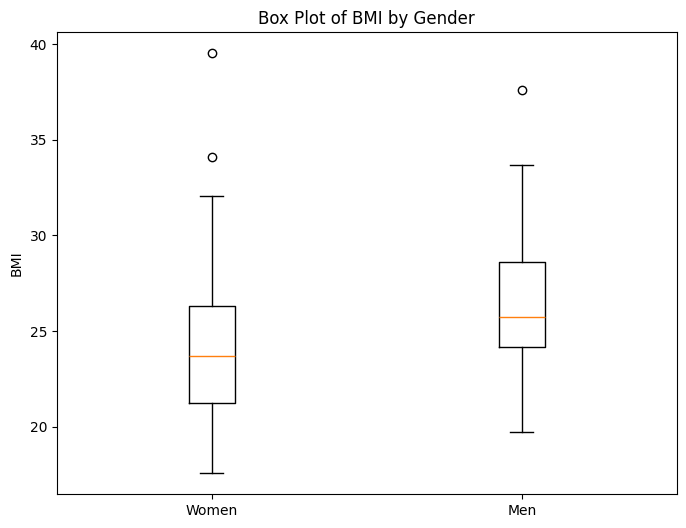

Women: median=23.69, IQR=5.03
Men: median=25.73, IQR=4.48
Men have a higher median BMI than women.
BMI values for women are more spread out (higher IQR) than for men.


In [16]:
# Create box plots for BMI distributions of women and men
plt.figure(figsize=(8, 6))
plt.boxplot([df_women['BMI'], df_men['BMI']], labels=['Women', 'Men'])
plt.ylabel('BMI')
plt.title('Box Plot of BMI by Gender')
plt.show()

# Interpretation
q1_women, q3_women = df_women['BMI'].quantile([0.25, 0.75])
q1_men, q3_men = df_men['BMI'].quantile([0.25, 0.75])
median_women = df_women['BMI'].median()
median_men = df_men['BMI'].median()
iqr_women = q3_women - q1_women
iqr_men = q3_men - q1_men

print(f"Women: median={median_women:.2f}, IQR={iqr_women:.2f}")
print(f"Men: median={median_men:.2f}, IQR={iqr_men:.2f}")

if median_women > median_men:
    print("Women have a higher median BMI than men.")
elif median_women < median_men:
    print("Men have a higher median BMI than women.")
else:
    print("Women and men have similar median BMI.")

if iqr_women > iqr_men:
    print("BMI values for women are more spread out (higher IQR) than for men.")
elif iqr_women < iqr_men:
    print("BMI values for men are more spread out (higher IQR) than for women.")
else:
    print("BMI values for women and men have similar spread (IQR).")

# 6- Summary Statistics

In [17]:
# Helper function to compute summary statistics
def bmi_summary(series):
    return {
        'n': series.count(),
        'mean': series.mean(),
        'variance': series.var(ddof=1),
        'std_dev': series.std(ddof=1),
        'Q1': series.quantile(0.25),
        'Median': series.median(),
        'Q3': series.quantile(0.75)
    }

# Compute statistics for all, women, and men
summary_all = bmi_summary(df_new['BMI'])
summary_women = bmi_summary(df_women['BMI'])
summary_men = bmi_summary(df_men['BMI'])

# Create summary table
summary_df = pd.DataFrame([summary_all, summary_women, summary_men], 
                          index=['All', 'Women', 'Men'])
summary_df = summary_df[['n', 'mean', 'variance', 'std_dev', 'Q1', 'Median', 'Q3']]
summary_df = summary_df.round(2)
display(summary_df)


,n,mean,variance,std_dev,Q1,Median,Q3
All,145,25.25,14.69,3.83,22.59,24.69,27.64
Women,72,24.22,16.42,4.05,21.26,23.69,26.29
Men,73,26.27,11.07,3.33,24.15,25.73,28.63


## Part 2: Missing Values, Outliers, and Bivariate EDA

# 2- Outlier Detection and Handling

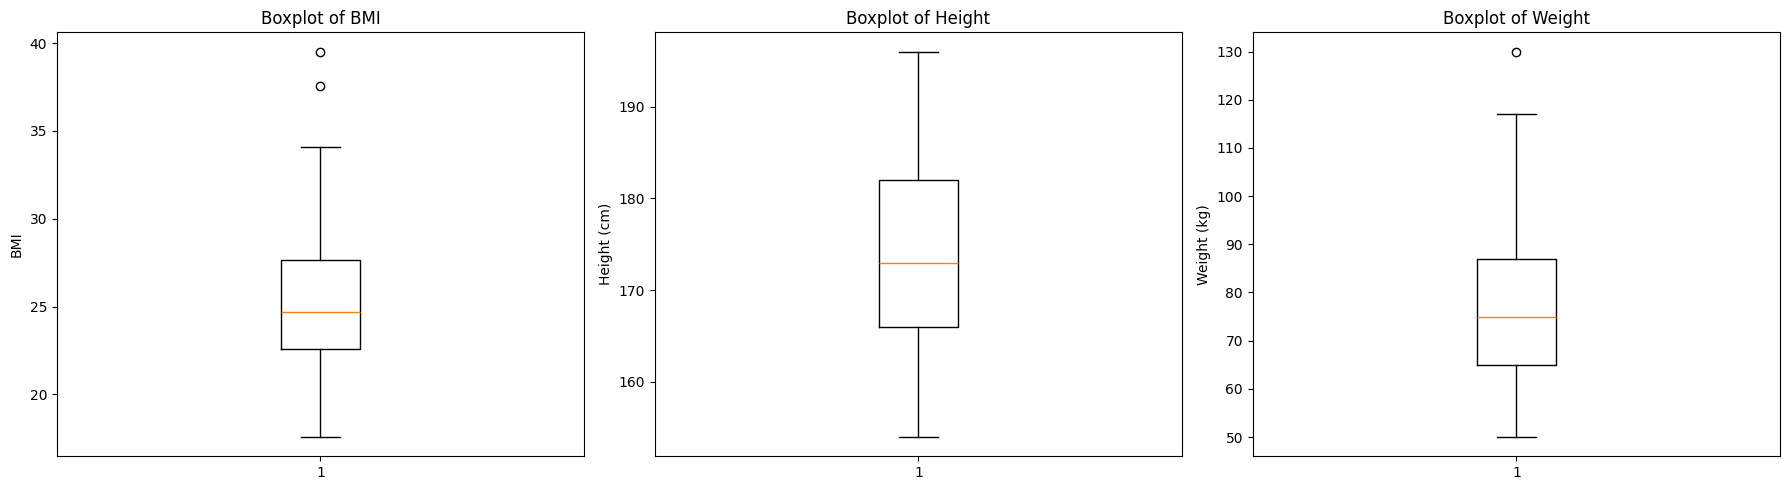

BMI outliers:
 73     37.576598
144    39.519741
Name: BMI, dtype: float64
BMI lower bound: 15.02, upper bound: 35.21

Height outliers:
 Series([], Name: height, dtype: float64)
Height lower bound: 142.00, upper bound: 206.00

Weight outliers:
 73    130.0
Name: weight, dtype: float64
Weight lower bound: 32.00, upper bound: 120.00

Extreme values in BMI by z-score:
73     37.576598
144    39.519741
Name: BMI, dtype: float64

Extreme values in weight by z-score:
73    130.0
Name: weight, dtype: float64



In [18]:
# Visual methods: Boxplots for BMI, height, and weight
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes[0].boxplot(df_new['BMI'], vert=True)
axes[0].set_title('Boxplot of BMI')
axes[0].set_ylabel('BMI')

axes[1].boxplot(df_new['height'], vert=True)
axes[1].set_title('Boxplot of Height')
axes[1].set_ylabel('Height (cm)')

axes[2].boxplot(df_new['weight'], vert=True)
axes[2].set_title('Boxplot of Weight')
axes[2].set_ylabel('Weight (kg)')

plt.tight_layout()
plt.show()

# Statistical methods: IQR rule for outlier detection
def find_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = series[(series < lower) | (series > upper)]
    return outliers, lower, upper

bmi_outliers, bmi_lower, bmi_upper = find_outliers_iqr(df_new['BMI'])
height_outliers, height_lower, height_upper = find_outliers_iqr(df_new['height'])
weight_outliers, weight_lower, weight_upper = find_outliers_iqr(df_new['weight'])

print("BMI outliers:\n", bmi_outliers)
print(f"BMI lower bound: {bmi_lower:.2f}, upper bound: {bmi_upper:.2f}\n")

print("Height outliers:\n", height_outliers)
print(f"Height lower bound: {height_lower:.2f}, upper bound: {height_upper:.2f}\n")

print("Weight outliers:\n", weight_outliers)
print(f"Weight lower bound: {weight_lower:.2f}, upper bound: {weight_upper:.2f}\n")

# Z-score method for additional check

df_z = df_new[['BMI', 'height', 'weight']].apply(zscore)
z_outliers = (df_z.abs() > 3)

for col in ['BMI', 'height', 'weight']:
    extreme = df_new[col][z_outliers[col]]
    if not extreme.empty:
        print(f"Extreme values in {col} by z-score:\n{extreme}\n")

In [19]:
# Combine indices of BMI and weight outliers
outlier_indices = set(bmi_outliers.index).union(weight_outliers.index)

# Show which rows will be removed
print("Indices of rows to remove due to outliers:", outlier_indices)

# Remove outliers from df_new
df_no_outliers = df_new.drop(index=outlier_indices).reset_index(drop=True)

# Show effect on dataset
print(f"Original dataset size: {df_new.shape[0]}")
print(f"Dataset size after removing outliers: {df_no_outliers.shape[0]}")

# Compare summary statistics before and after
summary_before = df_new['BMI'].describe()
summary_after = df_no_outliers['BMI'].describe()

print("\nBMI summary before removing outliers:")
print(summary_before)
print("\nBMI summary after removing outliers:")
print(summary_after)

Indices of rows to remove due to outliers: {144, 73}
Original dataset size: 145
Dataset size after removing outliers: 143

BMI summary before removing outliers:
count    145.000000
mean      25.247948
std        3.832243
min       17.577069
25%       22.589551
50%       24.691358
75%       27.636054
max       39.519741
Name: BMI, dtype: float64

BMI summary after removing outliers:
count    143.000000
mean      25.061931
std        3.514726
min       17.577069
25%       22.586130
50%       24.691358
75%       27.471698
max       34.080658
Name: BMI, dtype: float64


# 3- Bivariate Exploratory Data Analysis (EDA)

## a) BMI and Fast Food Consumption

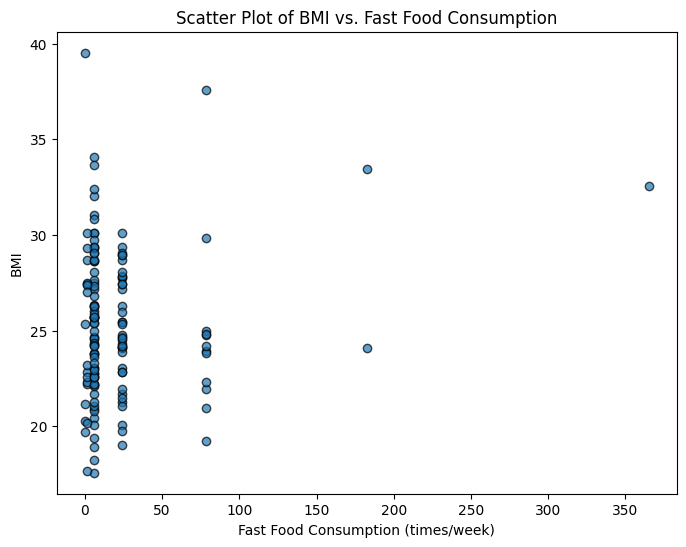

Correlation coefficient between BMI and fast food consumption: 0.15
Interpretation: There is little to no linear association between BMI and fast food consumption.


In [20]:
# Scatter plot of BMI vs. fast food consumption
plt.figure(figsize=(8, 6))
plt.scatter(df_new['fastfood'], df_new['BMI'], alpha=0.7, edgecolor='k')
plt.xlabel('Fast Food Consumption (times/week)')
plt.ylabel('BMI')
plt.title('Scatter Plot of BMI vs. Fast Food Consumption')
plt.show()

# Calculate correlation coefficient
corr = df_new['BMI'].corr(df_new['fastfood'])
print(f"Correlation coefficient between BMI and fast food consumption: {corr:.2f}")

# Interpretation
if abs(corr) < 0.3:
    interpretation = "There is little to no linear association between BMI and fast food consumption."
elif abs(corr) < 0.7:
    interpretation = "There is a moderate linear association between BMI and fast food consumption."
else:
    interpretation = "There is a strong linear association between BMI and fast food consumption."

print("Interpretation:", interpretation)

## b) BMI by Gender

C:\Users\bruno\AppData\Local\Temp\ipykernel_32048\3533424439.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='BMI', data=df_new, palette='Set2')
C:\Users\bruno\AppData\Local\Temp\ipykernel_32048\3533424439.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='gender', y='BMI', data=df_new, palette='Set2')


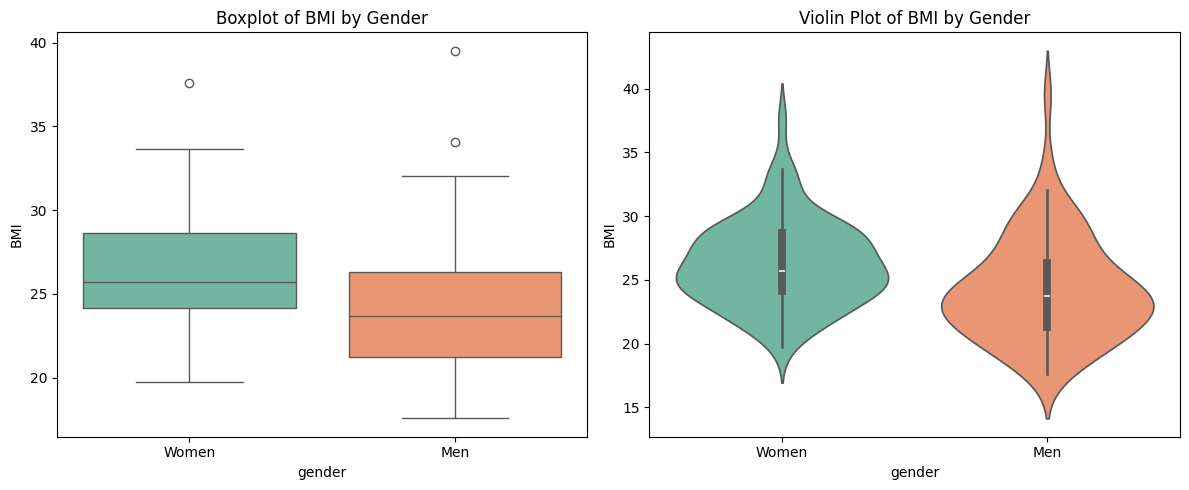

T-test: statistic = -3.33, p-value = 0.0011
Mann-Whitney U test: statistic = 1702.50, p-value = 0.0003
There is a significant difference in BMI between genders (t-test).
There is a significant difference in BMI between genders (Mann-Whitney U test).


In [21]:
# Boxplot and violin plot for BMI by gender
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='gender', y='BMI', data=df_new, palette='Set2')
plt.xticks([0, 1], ['Women', 'Men'])
plt.title('Boxplot of BMI by Gender')

plt.subplot(1, 2, 2)
sns.violinplot(x='gender', y='BMI', data=df_new, palette='Set2')
plt.xticks([0, 1], ['Women', 'Men'])
plt.title('Violin Plot of BMI by Gender')

plt.tight_layout()
plt.show()

# Prepare BMI data for each gender
bmi_women = df_new[df_new['gender'] == '0']['BMI']
bmi_men = df_new[df_new['gender'] == '1']['BMI']

# Test for significant differences
t_stat, t_p = ttest_ind(bmi_women, bmi_men, equal_var=False)
u_stat, u_p = mannwhitneyu(bmi_women, bmi_men, alternative='two-sided')

print(f"T-test: statistic = {t_stat:.2f}, p-value = {t_p:.4f}")
print(f"Mann-Whitney U test: statistic = {u_stat:.2f}, p-value = {u_p:.4f}")

if t_p < 0.05:
    print("There is a significant difference in BMI between genders (t-test).")
else:
    print("No significant difference in BMI between genders (t-test).")

if u_p < 0.05:
    print("There is a significant difference in BMI between genders (Mann-Whitney U test).")
else:
    print("No significant difference in BMI between genders (Mann-Whitney U test).")

## c) BMI by Urbanity

C:\Users\bruno\AppData\Local\Temp\ipykernel_32048\2467971553.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='urbanity', y='BMI', data=df_new, palette='Set3')


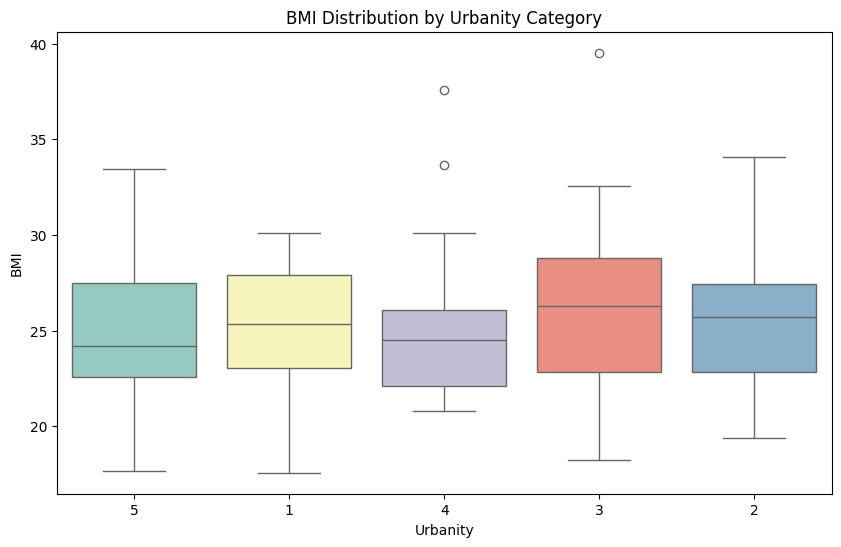

,count,mean,median,std
urbanity,,,,
1,12,25.33,25.34,3.55
2,23,25.34,25.71,3.65
3,27,26.26,26.29,4.64
4,22,25.18,24.52,4.25
5,61,24.77,24.21,3.42


Observation:
- The boxplot shows the spread and central tendency of BMI for each urbanity category.
- Check for differences in median, spread, or presence of outliers across categories.
- The summary table provides mean and median BMI for each group, which can be used to discuss trends.


In [22]:
# Boxplot of BMI by urbanity category
plt.figure(figsize=(10, 6))
sns.boxplot(x='urbanity', y='BMI', data=df_new, palette='Set3')
plt.xlabel('Urbanity')
plt.ylabel('BMI')
plt.title('BMI Distribution by Urbanity Category')
plt.show()

# Calculate mean and median BMI for each urbanity category
urbanity_stats = df_new.groupby('urbanity')['BMI'].agg(['count', 'mean', 'median', 'std']).round(2)
display(urbanity_stats)

# Discussion
print("Observation:")
print("- The boxplot shows the spread and central tendency of BMI for each urbanity category.")
print("- Check for differences in median, spread, or presence of outliers across categories.")
print("- The summary table provides mean and median BMI for each group, which can be used to discuss trends.")

## d) Additional Bivariate Relationships

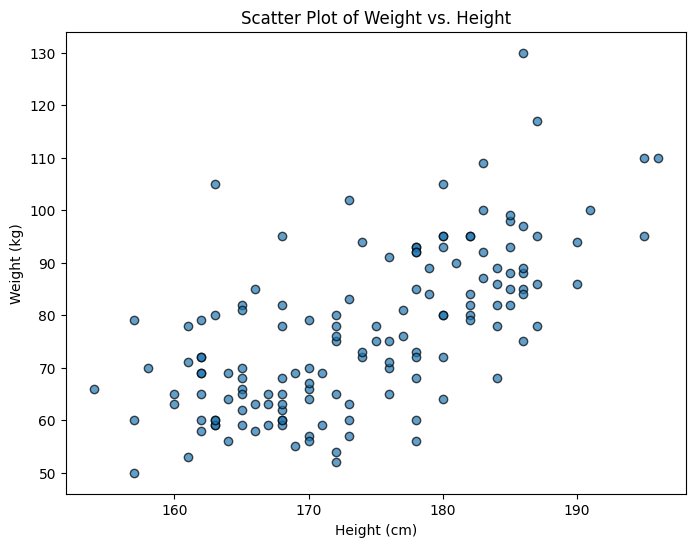

Correlation coefficient between weight and height: 0.66


C:\Users\bruno\AppData\Local\Temp\ipykernel_32048\1441410405.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='fastfood', data=df_new, palette='Set2')


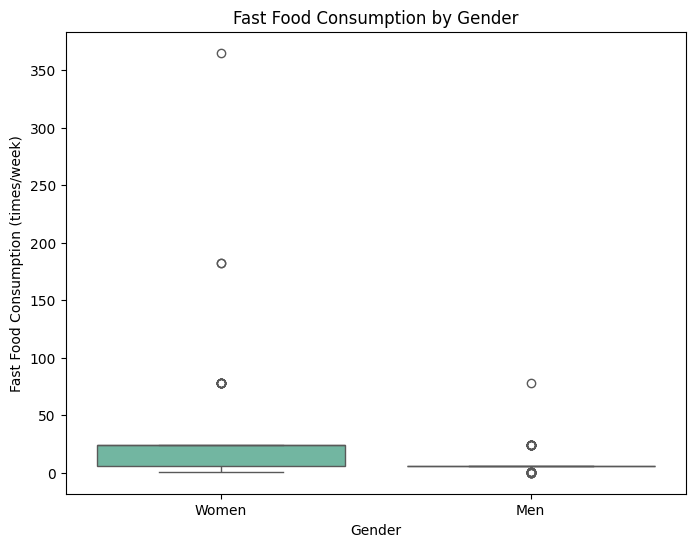

,count,mean,median,std
Women,72,10.03,6.0,11.63
Men,73,31.89,24.0,53.64


T-test (fast food): statistic = -3.40, p-value = 0.0011
Mann-Whitney U test (fast food): statistic = 1730.50, p-value = 0.0001
There is a significant difference in fast food consumption between genders (t-test).
There is a significant difference in fast food consumption between genders (Mann-Whitney U test).


In [23]:
# Scatter plot: Weight vs. Height
plt.figure(figsize=(8, 6))
plt.scatter(df_new['height'], df_new['weight'], alpha=0.7, edgecolor='k')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Scatter Plot of Weight vs. Height')
plt.show()

# Correlation coefficient for weight vs. height
corr_wh = df_new['weight'].corr(df_new['height'])
print(f"Correlation coefficient between weight and height: {corr_wh:.2f}")

# Boxplot: Fast food consumption by gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='fastfood', data=df_new, palette='Set2')
plt.xticks([0, 1], ['Women', 'Men'])
plt.xlabel('Gender')
plt.ylabel('Fast Food Consumption (times/week)')
plt.title('Fast Food Consumption by Gender')
plt.show()

# Compare fast food consumption statistics by gender
fastfood_stats = df_new.groupby('gender')['fastfood'].agg(['count', 'mean', 'median', 'std']).round(2)
fastfood_stats.index = ['Women', 'Men']
display(fastfood_stats)

# Test for significant difference in fast food consumption between genders
ff_women = df_new[df_new['gender'] == '0']['fastfood']
ff_men = df_new[df_new['gender'] == '1']['fastfood']
t_stat_ff, t_p_ff = ttest_ind(ff_women, ff_men, equal_var=False)
u_stat_ff, u_p_ff = mannwhitneyu(ff_women, ff_men, alternative='two-sided')

print(f"T-test (fast food): statistic = {t_stat_ff:.2f}, p-value = {t_p_ff:.4f}")
print(f"Mann-Whitney U test (fast food): statistic = {u_stat_ff:.2f}, p-value = {u_p_ff:.4f}")

if t_p_ff < 0.05:
    print("There is a significant difference in fast food consumption between genders (t-test).")
else:
    print("No significant difference in fast food consumption between genders (t-test).")

if u_p_ff < 0.05:
    print("There is a significant difference in fast food consumption between genders (Mann-Whitney U test).")
else:
    print("No significant difference in fast food consumption between genders (Mann-Whitney U test).")